<a href="https://colab.research.google.com/github/minhlip/Machine-Learning-IDS-CICIDS2017/blob/main/MLforEachAttacksFile-V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performance Evaluation of Classification Models in three approaches

### Attack files sort based on size
Result:
- Heartbleed.csv: 14 KB
- Infiltration.csv: 42 KB
- Bot.csv: 2034 KB
- Web Attack.csv: 2238 KB
- DoS Slowhttptest.csv: 5916 KB
- SSH-Patator.csv: 6211 KB
- DoS slowloris.csv: 6276 KB
- FTP-Patator.csv: 8475 KB
- DoS GoldenEye.csv: 11466 KB
- DDoS.csv: 138260 KB
- PortScan.csv: 155753 KB
- DoS Hulk.csv: 249844 KB


In [3]:
import os

csv_files = ['Heartbleed.csv', 'DoS Hulk.csv', 'DoS GoldenEye.csv', 'PortScan.csv', 'SSH-Patator.csv',
             'DoS Slowhttptest.csv', 'DDoS.csv', 'Infiltration.csv', 'FTP-Patator.csv', 'DoS slowloris.csv',
             'Web Attack.csv', 'Bot.csv']

folder_path = "/content/drive/MyDrive/CSVs/attacks/"

file_sizes = {}
for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    size = os.path.getsize(file_path) / 1024
    file_sizes[file_name] = size
    print(f"File: {file_name}, Size: {round(size)} KB")

sorted_files = sorted(file_sizes, key=file_sizes.get)

print(sorted_files)

File: Heartbleed.csv, Size: 14 KB
File: DoS Hulk.csv, Size: 249844 KB
File: DoS GoldenEye.csv, Size: 11466 KB
File: PortScan.csv, Size: 155753 KB
File: SSH-Patator.csv, Size: 6211 KB
File: DoS Slowhttptest.csv, Size: 5916 KB
File: DDoS.csv, Size: 138260 KB
File: Infiltration.csv, Size: 42 KB
File: FTP-Patator.csv, Size: 8475 KB
File: DoS slowloris.csv, Size: 6276 KB
File: Web Attack.csv, Size: 2238 KB
File: Bot.csv, Size: 2034 KB
['Heartbleed.csv', 'Infiltration.csv', 'Bot.csv', 'Web Attack.csv', 'DoS Slowhttptest.csv', 'SSH-Patator.csv', 'DoS slowloris.csv', 'FTP-Patator.csv', 'DoS GoldenEye.csv', 'DDoS.csv', 'PortScan.csv', 'DoS Hulk.csv']


### Features sort based on Attack files index

In [4]:
csv_files_names = [name.replace('.csv', '') for name in sorted_files]

features = {
    "Bot": ["Bwd Packet Length Mean","Flow IAT Std","Flow IAT Max","Flow Duration","Flow IAT Min", "Label"],
    "DDoS": ["Bwd Packet Length Std","Total Backward Packets","Total Length of Fwd Packets","Fwd Packet Length Max","Fwd Packet Length Std","Label"],
    "DoS GoldenEye": ["Bwd Packet Length Std","Flow IAT Min","Flow IAT Mean","Total Backward Packets","Flow IAT Std", "Label"],
    "DoS Hulk": ["Bwd Packet Length Std","Flow IAT Min","Flow Duration","Fwd Packet Length Std","Fwd Packet Length Max","Label"],
    "DoS slowloris": ["Flow IAT Mean","Bwd Packet Length Mean","Total Fwd Packets","Flow IAT Min","Total Length of Bwd Packets", "Label"],
    "DoS Slowhttptest": ["Flow Packets/s","Fwd Packet Length Min","Bwd Packet Length Std","Bwd Packet Length Mean","Fwd Packet Length Std", "Label"],
    "FTP-Patator": ["Fwd Packet Length Std","Fwd Packet Length Max","Bwd Packet Length Max","Bwd Packet Length Mean","Flow IAT Min", "Label"],
    "Heartbleed": ["Total Length of Fwd Packets","Total Backward Packets","Bwd Packet Length Max","Total Length of Bwd Packets","Flow IAT Min", "Label"],
    "Infiltration": ["Total Length of Fwd Packets","Fwd Packet Length Std","Flow Duration","Fwd Packet Length Mean","Flow IAT Max", "Label"],
    "PortScan": ["Total Length of Fwd Packets","Flow Bytes/s","Bwd Packet Length Std","Total Fwd Packets","Fwd Packet Length Std", "Label"],
    "SSH-Patator": ["Flow Bytes/s","Flow IAT Min","Flow IAT Mean","Bwd Packet Length Min","Flow Packets/s", "Label"],
    "Web Attack": ["Flow IAT Min","Flow IAT Max","Flow Duration","Total Length of Fwd Packets","Flow IAT Mean", "Label"]
}

# Sắp xếp từ điển theo mảng csv_files_names
sorted_features = {key: features[key] for key in csv_files_names}
sorted_features

{'Heartbleed': ['Total Length of Fwd Packets',
  'Total Backward Packets',
  'Bwd Packet Length Max',
  'Total Length of Bwd Packets',
  'Flow IAT Min',
  'Label'],
 'Infiltration': ['Total Length of Fwd Packets',
  'Fwd Packet Length Std',
  'Flow Duration',
  'Fwd Packet Length Mean',
  'Flow IAT Max',
  'Label'],
 'Bot': ['Bwd Packet Length Mean',
  'Flow IAT Std',
  'Flow IAT Max',
  'Flow Duration',
  'Flow IAT Min',
  'Label'],
 'Web Attack': ['Flow IAT Min',
  'Flow IAT Max',
  'Flow Duration',
  'Total Length of Fwd Packets',
  'Flow IAT Mean',
  'Label'],
 'DoS Slowhttptest': ['Flow Packets/s',
  'Fwd Packet Length Min',
  'Bwd Packet Length Std',
  'Bwd Packet Length Mean',
  'Fwd Packet Length Std',
  'Label'],
 'SSH-Patator': ['Flow Bytes/s',
  'Flow IAT Min',
  'Flow IAT Mean',
  'Bwd Packet Length Min',
  'Flow Packets/s',
  'Label'],
 'DoS slowloris': ['Flow IAT Mean',
  'Bwd Packet Length Mean',
  'Total Fwd Packets',
  'Flow IAT Min',
  'Total Length of Bwd Packets',
 

### Global Variables setup for three approaches
There are three approaches for these model:
- 8/2: 8 for training set, 2 for test set
- 7/3: 7 for training set, 3 for test set
- 6/4: 6 for training set, 4 for test set

In [5]:
import os

first_test_size = 0.20
second_test_size = 0.30
third_test_size = 0.40

path = "/content/drive/MyDrive/CSVs/attacks/"
repetition = 10

result_graph_1 = "/content/drive/MyDrive/CSVs/result/result_graph_1/"
result_graph_2 = "/content/drive/MyDrive/CSVs/result/result_graph_2/"
result_graph_3 = "/content/drive/MyDrive/CSVs/result/result_graph_3/"

result_1 = "/content/drive/MyDrive/CSVs/result/result_1.csv"
result_2 = "/content/drive/MyDrive/CSVs/result/result_2.csv"
result_3 = "/content/drive/MyDrive/CSVs/result/result_3.csv"


In [6]:
def folder(f_name): #this function creates a folder named "results" and "result_graph_1" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")

folder_names = [result_graph_1, result_graph_2, result_graph_3]

folder_name="/content/drive/MyDrive/CSVs/result/"
folder(folder_name)

for folder_name in folder_names:
    folder(folder_name)

### Import Library

In [7]:

from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
import csv
import time
import warnings
import math
warnings.filterwarnings("ignore")


### Machine Learning list

In [8]:

ml_list = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(max_depth = 5, n_estimators=10, max_features=1),
    "SVM": LinearSVC(),
    "Nearest Neighbors": KNeighborsClassifier(3)
}

### Performance Evaluation of Classification Models on First Approach (8/2)


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
Heartbleed        Naive Bayes        1.0             1.0             1.0             1.0             0.0111         
Heartbleed        Random Forest      1.0             1.0             1.0             1.0             0.0285         
Heartbleed        SVM                1.0             1.0             1.0             1.0             0.0122         
Heartbleed        Nearest Neighbors  1.0             1.0             1.0             1.0             0.0148         


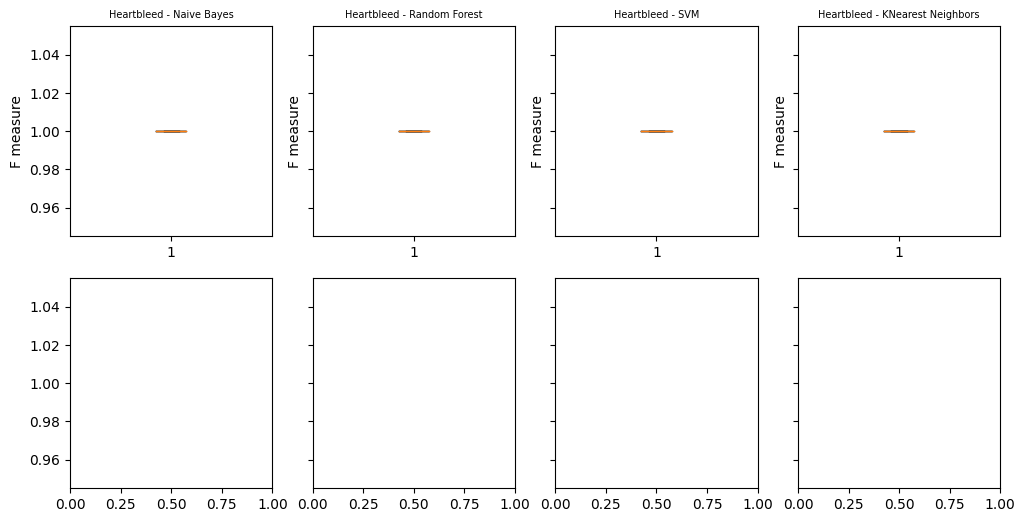


------------------------------------------------------------------------------------------------------


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
Infiltration      Naive Bayes        0.88            0.91            0.85            0.86            0.0113         
Infiltration      Random Forest      0.86            0.9             0.84            0.85            0.0334         
Infiltration      SVM                0.65            0.63            0.6             0.55            0.0162         
Infiltration      Nearest Neighbors  0.96            0.97            0.95            0.96            0.0204         


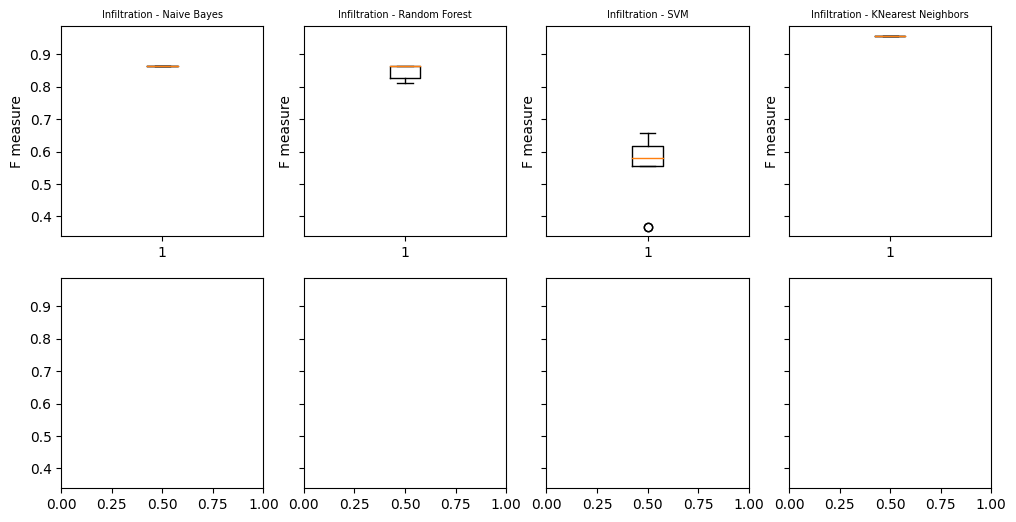


------------------------------------------------------------------------------------------------------


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
Bot               Naive Bayes        0.54            0.69            0.68            0.54            0.0249         
Bot               Random Forest      0.95            0.94            0.96            0.95            0.0816         
Bot               SVM                0.46            0.42            0.42            0.38            0.3171         
Bot               Nearest Neighbors  0.96            0.95            0.97            0.96            0.1639         


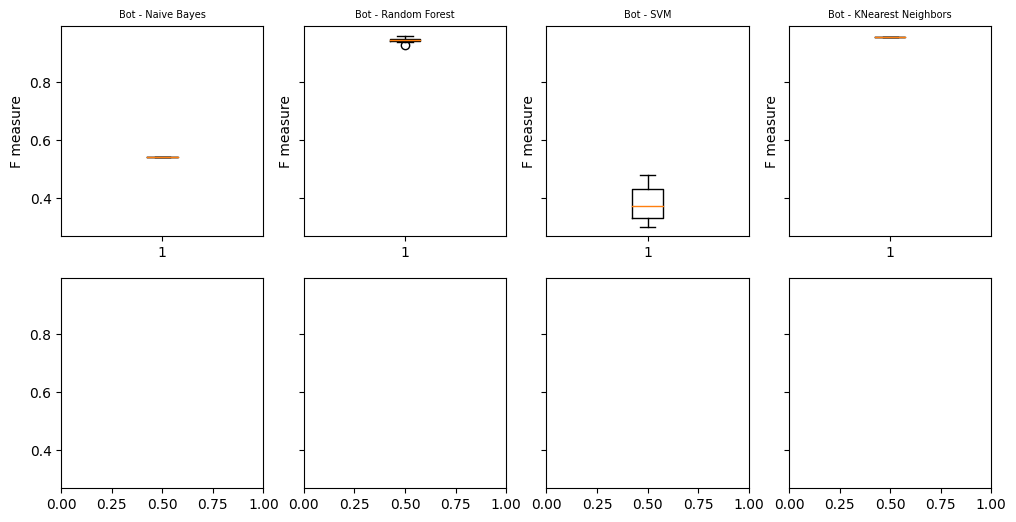


------------------------------------------------------------------------------------------------------


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
Web Attack        Naive Bayes        0.51            0.7             0.65            0.51            0.0196         
Web Attack        Random Forest      0.96            0.97            0.94            0.95            0.1291         
Web Attack        SVM                0.67            0.54            0.61            0.55            0.7561         
Web Attack        Nearest Neighbors  0.96            0.95            0.95            0.95            0.2301         


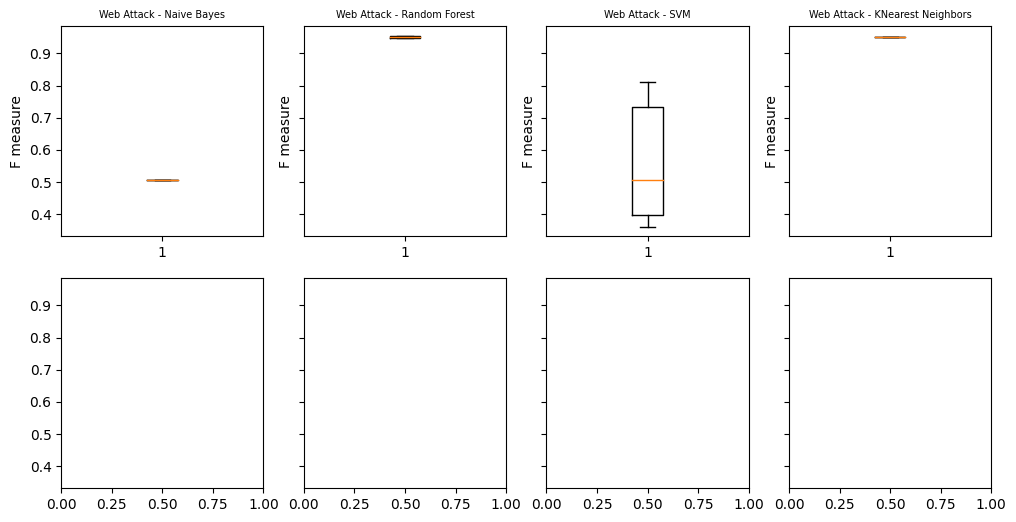


------------------------------------------------------------------------------------------------------


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
DoS Slowhttptest  Naive Bayes        0.74            0.84            0.57            0.55            0.0248         
DoS Slowhttptest  Random Forest      0.99            0.99            0.98            0.98            0.0998         
DoS Slowhttptest  SVM                0.86            0.84            0.86            0.84            0.9068         
DoS Slowhttptest  Nearest Neighbors  0.99            0.99            0.99            0.99            0.4559         


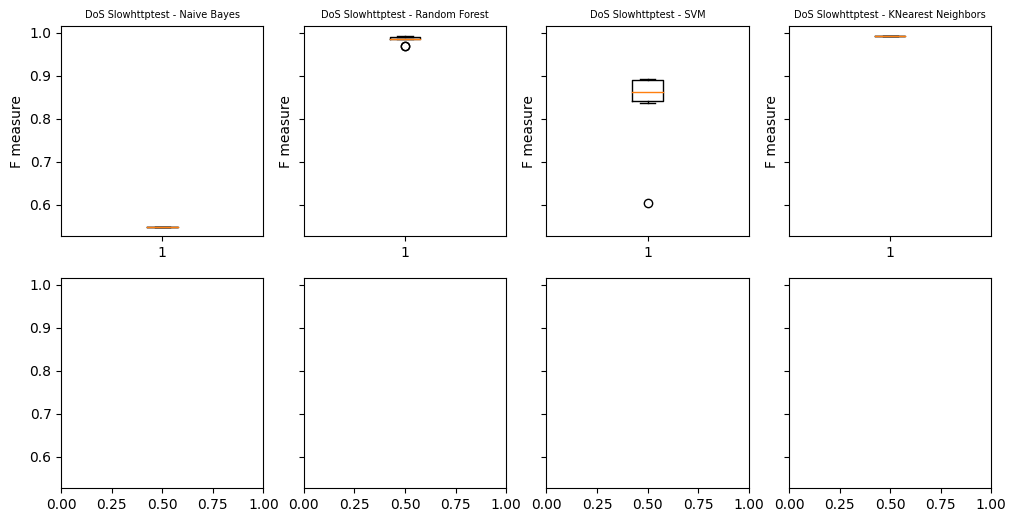


------------------------------------------------------------------------------------------------------


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
SSH-Patator       Naive Bayes        0.73            0.76            0.81            0.72            0.0257         
SSH-Patator       Random Forest      0.95            0.93            0.96            0.94            0.1126         
SSH-Patator       SVM                0.75            0.63            0.65            0.61            1.5252         
SSH-Patator       Nearest Neighbors  0.95            0.94            0.96            0.95            0.5923         


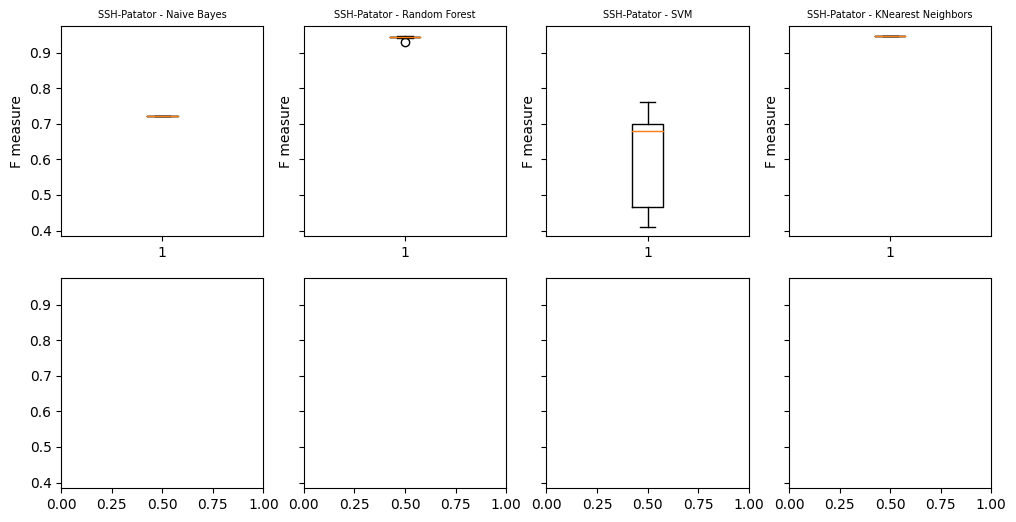


------------------------------------------------------------------------------------------------------


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
DoS slowloris     Naive Bayes        0.42            0.67            0.59            0.4             0.0217         
DoS slowloris     Random Forest      0.95            0.95            0.94            0.95            0.094          
DoS slowloris     SVM                0.7             0.69            0.65            0.63            1.3649         
DoS slowloris     Nearest Neighbors  0.95            0.94            0.95            0.95            0.7829         


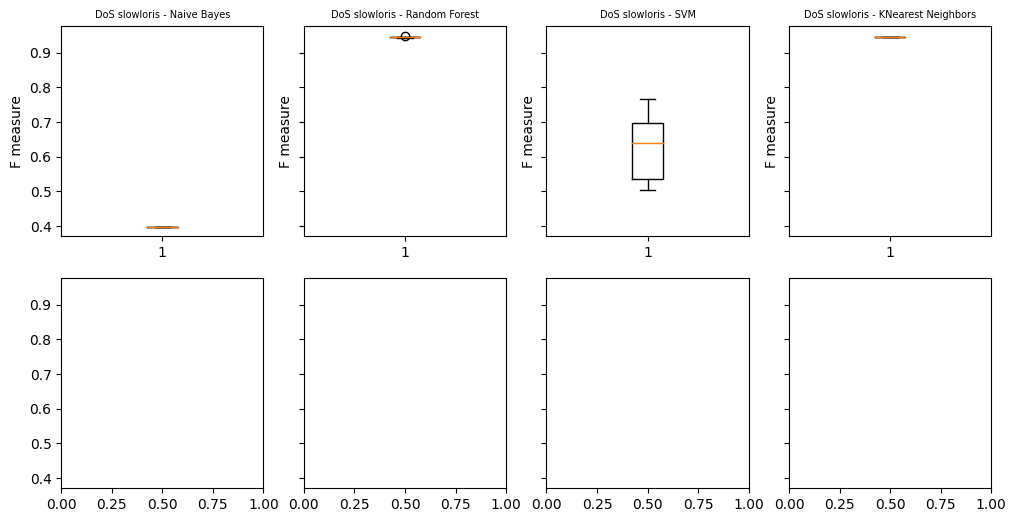


------------------------------------------------------------------------------------------------------


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
FTP-Patator       Naive Bayes        0.56            0.7             0.69            0.56            0.0284         
FTP-Patator       Random Forest      1.0             1.0             1.0             1.0             0.0983         
FTP-Patator       SVM                0.71            0.72            0.74            0.68            2.3105         
FTP-Patator       Nearest Neighbors  1.0             1.0             1.0             1.0             1.1797         


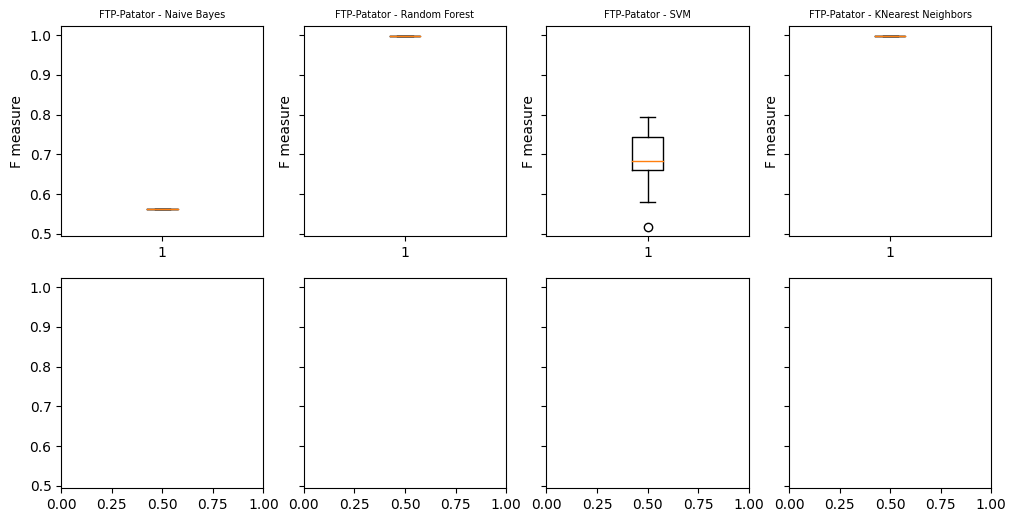


------------------------------------------------------------------------------------------------------


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
DoS GoldenEye     Naive Bayes        0.88            0.9             0.81            0.84            0.0489         
DoS GoldenEye     Random Forest      0.99            0.99            0.99            0.99            0.2035         
DoS GoldenEye     SVM                0.75            0.65            0.64            0.61            3.3215         
DoS GoldenEye     Nearest Neighbors  0.97            0.97            0.97            0.97            0.9083         


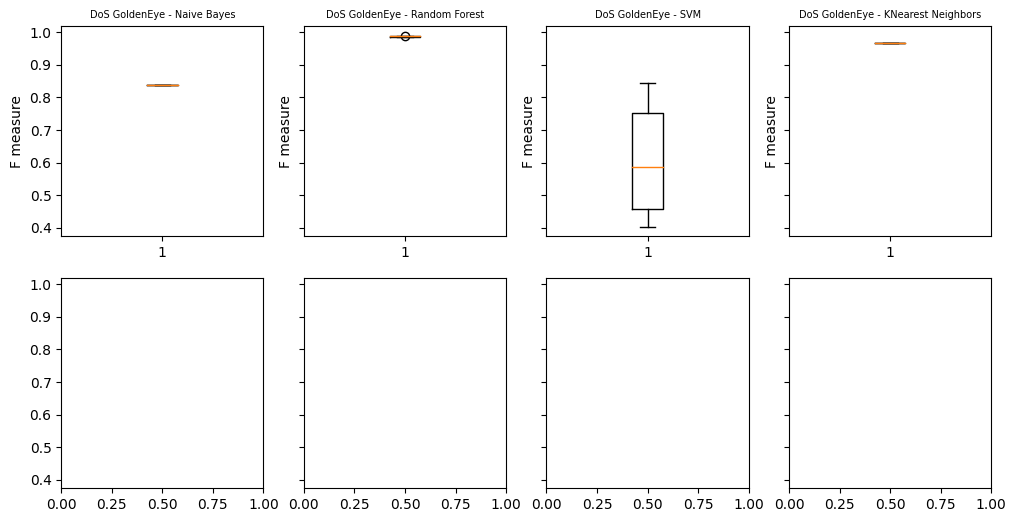


------------------------------------------------------------------------------------------------------


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
DDoS              Naive Bayes        0.6             0.71            0.71            0.6             0.3915         
DDoS              Random Forest      1.0             1.0             1.0             1.0             1.5717         
DDoS              SVM                0.97            0.96            0.96            0.96            82.8703        
DDoS              Nearest Neighbors  1.0             1.0             1.0             1.0             81.3283        


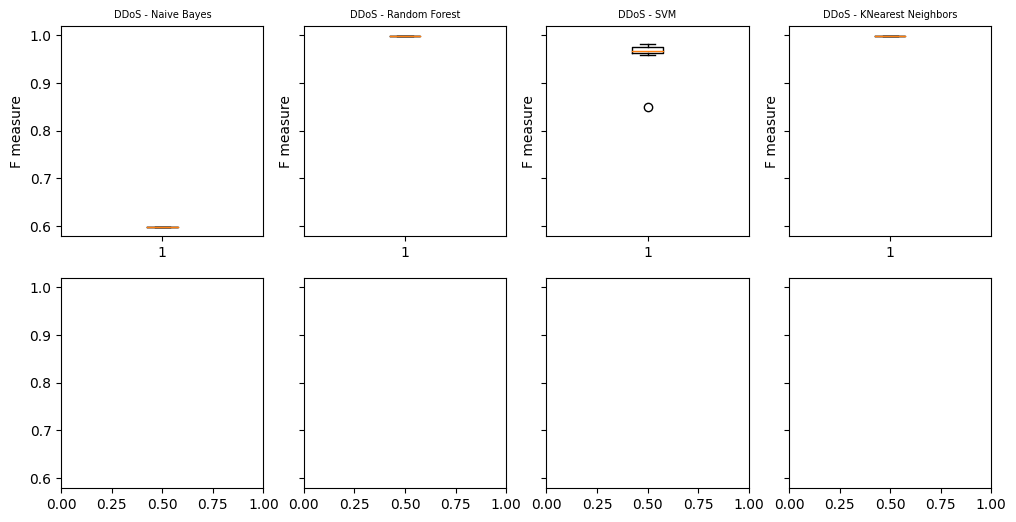


------------------------------------------------------------------------------------------------------


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
PortScan          Naive Bayes        0.38            0.65            0.56            0.35            0.365          
PortScan          Random Forest      1.0             1.0             1.0             1.0             2.8523         
PortScan          SVM                0.73            0.64            0.68            0.62            129.7027       
PortScan          Nearest Neighbors  1.0             1.0             1.0             1.0             34.3224        


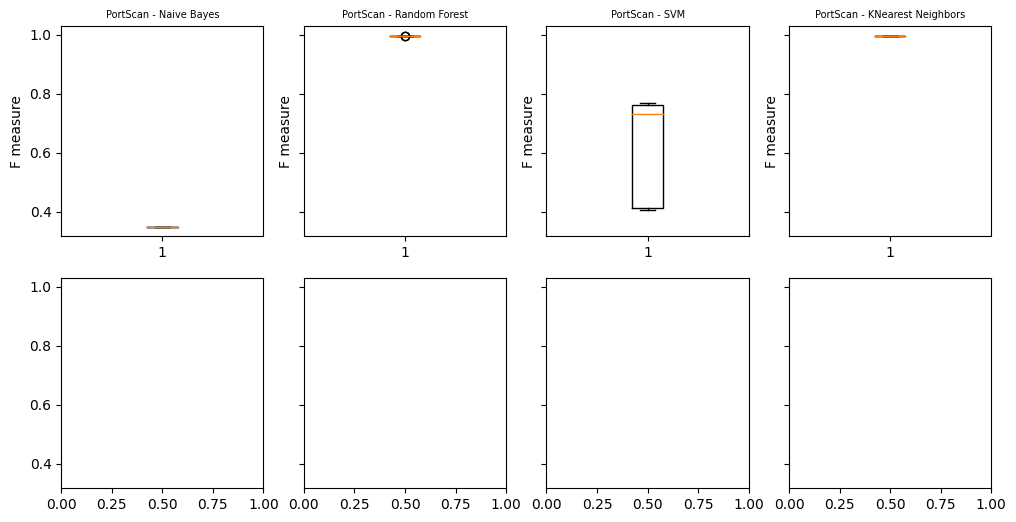


------------------------------------------------------------------------------------------------------


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
DoS Hulk          Naive Bayes        0.33            0.65            0.52            0.28            0.57           
DoS Hulk          Random Forest      0.95            0.96            0.93            0.94            4.6353         
DoS Hulk          SVM                0.76            0.76            0.69            0.68            185.2298       
DoS Hulk          Nearest Neighbors  0.97            0.96            0.97            0.96            40.0899        


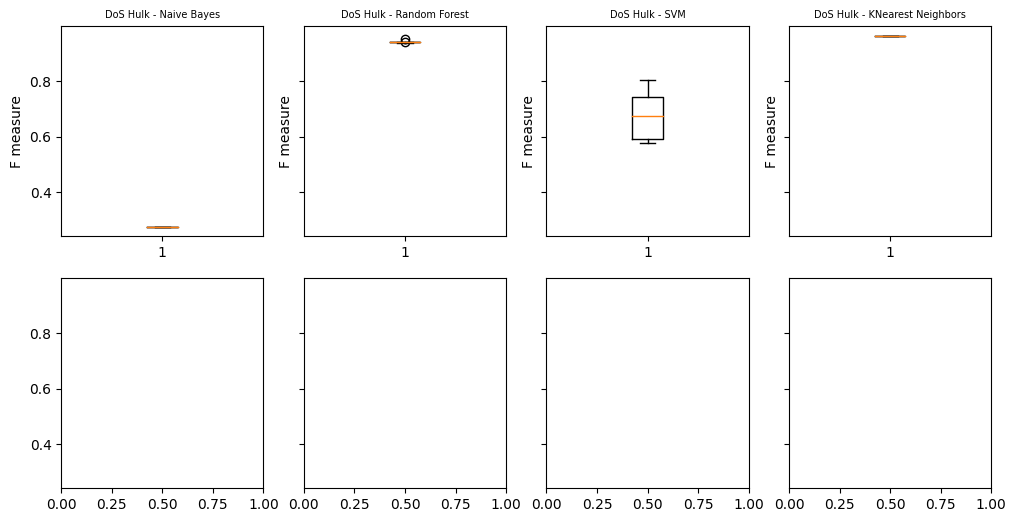


------------------------------------------------------------------------------------------------------


mission accomplished!
Total operation time: =  5857.471856832504 seconds


In [9]:


seconds=time.time()

with open(result_1, "w", newline="",encoding="utf-8") as f:
    wrt = csv.writer(f)
    wrt.writerow(["File","ML algorithm","accuracy","Precision", "Recall" , "F1-score","Time"])

for j in sorted_files: #this loop runs on the list containing the filenames.Operations are repeated for all attack files
    print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("File","ML algorithm","Accuracy","Precision", "Recall" , "F1-score","Time"))# print output header
    a=[]

    feature_list=list(sorted_features[j[0:-4]])
    df=pd.read_csv(path+j,usecols=feature_list)#read an attack file.
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]:
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)
    df["Label"]=attack_or_not


    y = df["Label"] #this section separates the label and the data into two separate pieces, as Label=y Data=X
    del df["Label"]
    feature_list.remove('Label')
    X = df[feature_list]


    for ii in ml_list: #this loop runs on the list containing the machine learning algorithm names. Operations are repeated for all the 7 algorithm
        precision=[]
        recall=[]
        f1=[]
        accuracy=[]
        t_time=[]
        for i in range(repetition): # This loop allows cross-validation and machine learning algorithm to be repeated 10 times
            second=time.time()#time stamp for processing time

            X_train, X_test, y_train, y_test = train_test_split(X, y,#  data (X) and labels (y) are divided into 2 parts to be sent to the machine learning algorithm (80% train,%20 test).
                test_size = first_test_size, random_state = repetition)#  So, in total there are 4 tracks: training data(X_train), training tag (y_train), test data(X_test) and test tag(y_test).


            #machine learning algorithm is applied in this section
            clf = ml_list[ii]#choose algorithm from ml_list dictionary
            clf.fit(X_train, y_train)
            predict=clf.predict(X_test)

            #makes "classification report" and assigns the precision, f-measure, and recall values.s.

            f_1=f1_score(y_test, predict, average='macro')
            pr=precision_score(y_test, predict, average='macro')
            rc=recall_score(y_test, predict, average='macro')

            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time()-second)) )



        print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (j[0:-4],ii,str(round(np.mean(accuracy),2)),str(round(np.mean(precision),2)),
            str(round(np.mean(recall),2)),str(round(np.mean(f1),2)),str(round(np.mean(t_time),4))))#the result of the ten repetitions is printed on the screen.

        with open(result_1, "a", newline="",encoding="utf-8") as f: # all the values found are saved in the opened file.
            wrt = csv.writer(f)
            for i in range(0,len(t_time)):
                wrt.writerow([j[0:-4],ii,accuracy[i],precision[i],recall[i],f1[i],t_time[i]])#file name, algorithm name, precision, recall and f-measure are writed in CSV file
        a.append(f1)


     # In this section, Box graphics are created for the results of machine learning algorithms and saved in the feaure_graph folder.


    ml=["Naive Bayes","Random Forest","SVM","KNearest Neighbors"]
    temp=0
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6), sharey=True)
    for c in range(2):
        for b in range(4):
           if temp < len(a):
            axes[c, b].boxplot(a[temp] )
            axes[c, b].set_title(str(j[0:-4])+" - "+str(ml[temp]),fontsize=7)
            axes[c, b].set_ylabel(("F measure"))
            temp+=1
            if temp==7:
                break
        if temp==7:
            break
    plt.savefig(result_graph_1+j[0:-4]+".pdf",bbox_inches='tight', orientation = 'portrait', format = 'pdf')
    plt.show()
    print("\n------------------------------------------------------------------------------------------------------\n\n")

print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")


The result for first approach takes approaximately 1 hr 37 min 37 sec




### Performance Evaluation of Classification Models on Second Approach (7/3)

File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
Heartbleed        Naive Bayes        1.0             1.0             1.0             1.0             0.0109         
Heartbleed        Random Forest      1.0             1.0             1.0             1.0             0.0286         
Heartbleed        SVM                1.0             1.0             1.0             1.0             0.0138         
Heartbleed        Nearest Neighbors  1.0             1.0             1.0             1.0             0.0239         


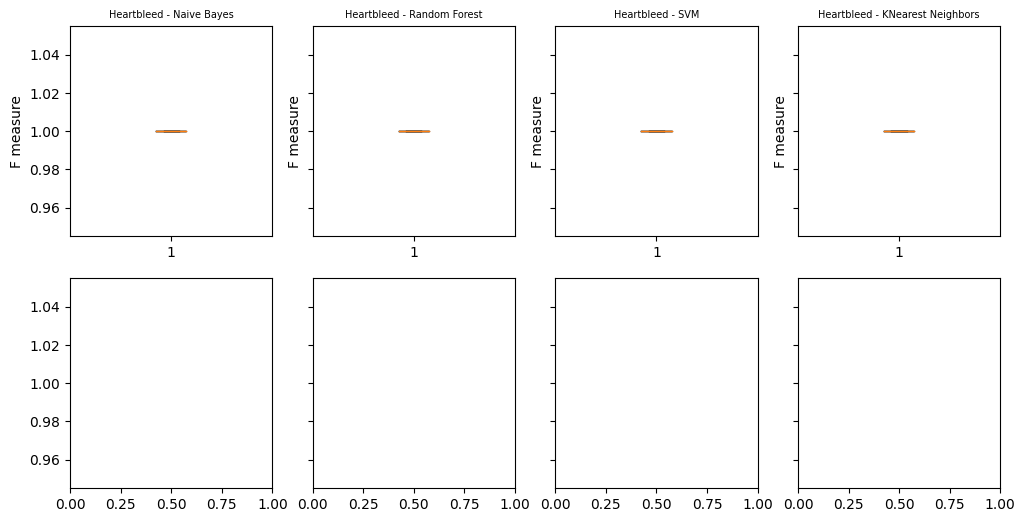


------------------------------------------------------------------------------------------------------


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
Infiltration      Naive Bayes        0.86            0.85            0.84            0.85            0.0189         
Infiltration      Random Forest      0.89            0.89            0.86            0.87            0.0503         
Infiltration      SVM                0.67            0.63            0.6             0.58            0.0229         
Infiltration      Nearest Neighbors  0.89            0.88            0.9             0.88            0.0279         


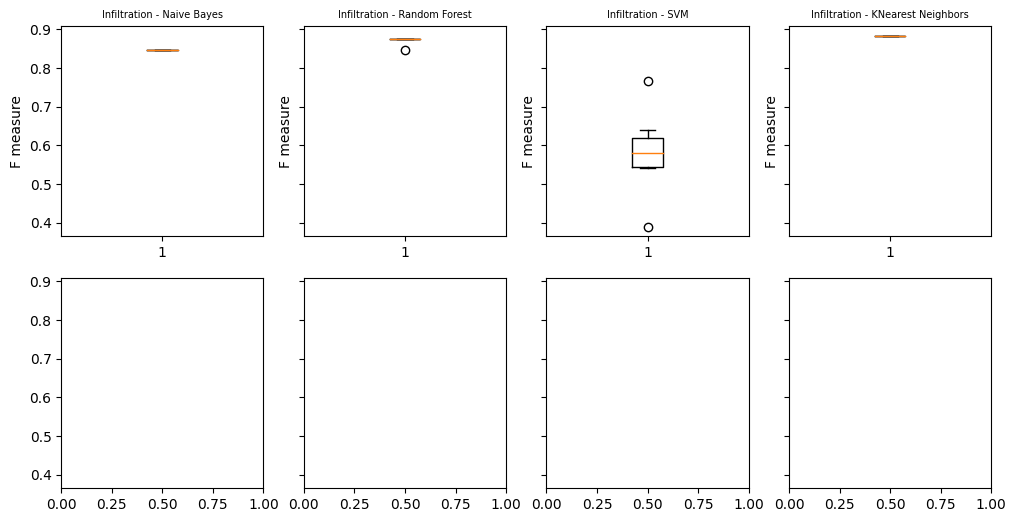


------------------------------------------------------------------------------------------------------


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
Bot               Naive Bayes        0.55            0.7             0.68            0.55            0.019          
Bot               Random Forest      0.96            0.94            0.96            0.95            0.0551         
Bot               SVM                0.54            0.39            0.44            0.4             0.2743         
Bot               Nearest Neighbors  0.97            0.95            0.97            0.96            0.2343         


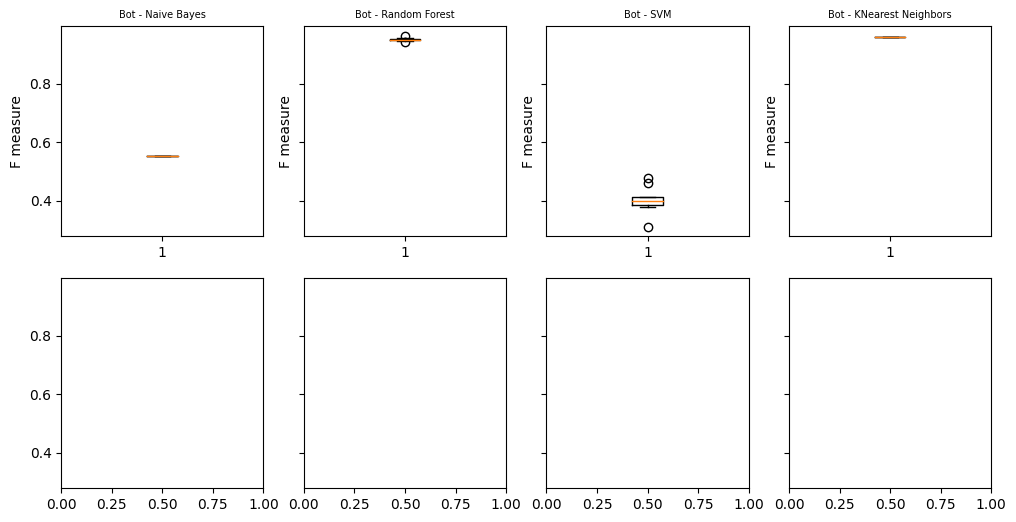


------------------------------------------------------------------------------------------------------


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
Web Attack        Naive Bayes        0.5             0.69            0.64            0.49            0.0169         
Web Attack        Random Forest      0.96            0.97            0.94            0.95            0.059          
Web Attack        SVM                0.72            0.7             0.75            0.69            0.4247         
Web Attack        Nearest Neighbors  0.95            0.94            0.95            0.95            0.2614         


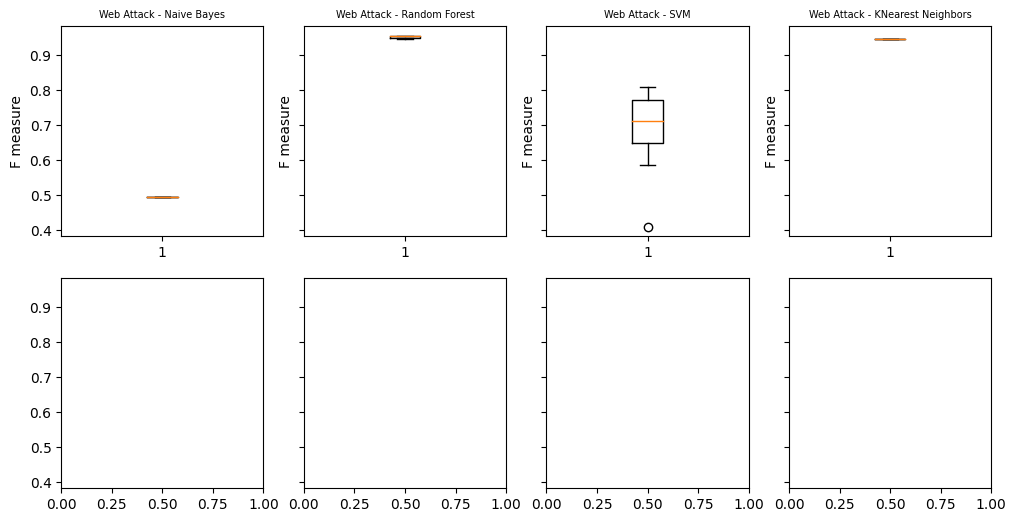


------------------------------------------------------------------------------------------------------


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
DoS Slowhttptest  Naive Bayes        0.73            0.82            0.57            0.54            0.0235         
DoS Slowhttptest  Random Forest      0.99            0.99            0.99            0.99            0.0916         
DoS Slowhttptest  SVM                0.79            0.8             0.82            0.78            0.7256         
DoS Slowhttptest  Nearest Neighbors  0.99            0.99            0.99            0.99            0.7146         


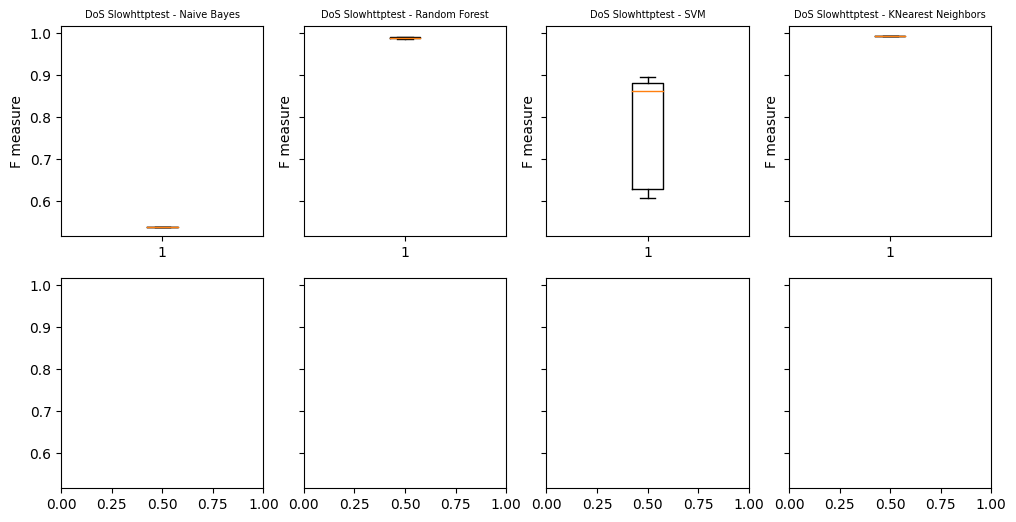


------------------------------------------------------------------------------------------------------


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
SSH-Patator       Naive Bayes        0.73            0.76            0.81            0.73            0.0261         
SSH-Patator       Random Forest      0.95            0.93            0.96            0.95            0.1029         
SSH-Patator       SVM                0.76            0.74            0.77            0.73            1.0364         
SSH-Patator       Nearest Neighbors  0.95            0.93            0.95            0.94            0.8089         


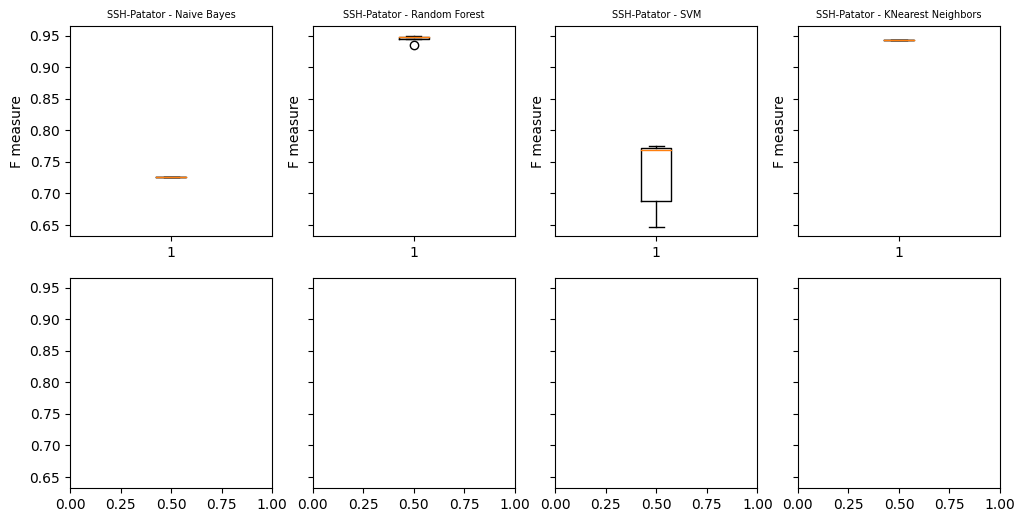


------------------------------------------------------------------------------------------------------


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
DoS slowloris     Naive Bayes        0.41            0.66            0.58            0.39            0.0263         
DoS slowloris     Random Forest      0.95            0.95            0.94            0.94            0.0952         
DoS slowloris     SVM                0.68            0.59            0.65            0.59            1.0212         
DoS slowloris     Nearest Neighbors  0.95            0.94            0.94            0.94            0.7709         


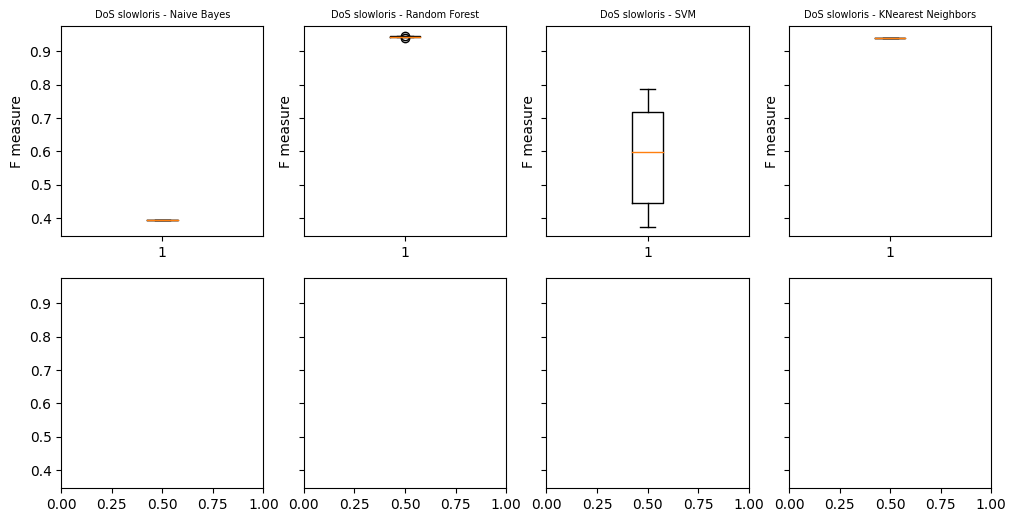


------------------------------------------------------------------------------------------------------


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
FTP-Patator       Naive Bayes        0.56            0.7             0.69            0.56            0.0313         
FTP-Patator       Random Forest      1.0             1.0             1.0             1.0             0.1395         
FTP-Patator       SVM                0.67            0.67            0.7             0.64            1.625          
FTP-Patator       Nearest Neighbors  1.0             1.0             1.0             1.0             1.0447         


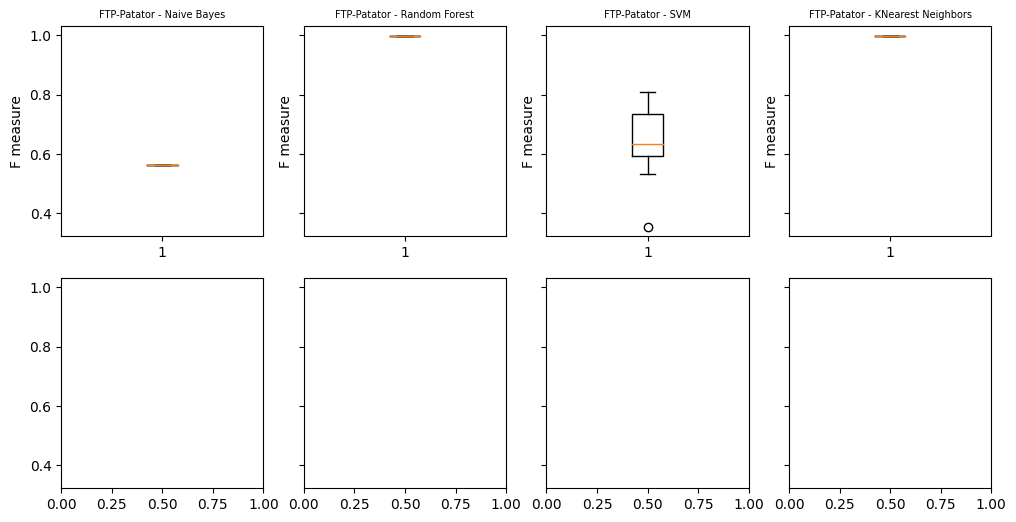


------------------------------------------------------------------------------------------------------


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
DoS GoldenEye     Naive Bayes        0.88            0.9             0.82            0.84            0.0552         
DoS GoldenEye     Random Forest      0.99            0.99            0.99            0.99            0.2401         
DoS GoldenEye     SVM                0.78            0.73            0.72            0.69            2.1071         
DoS GoldenEye     Nearest Neighbors  0.97            0.96            0.97            0.96            1.3531         


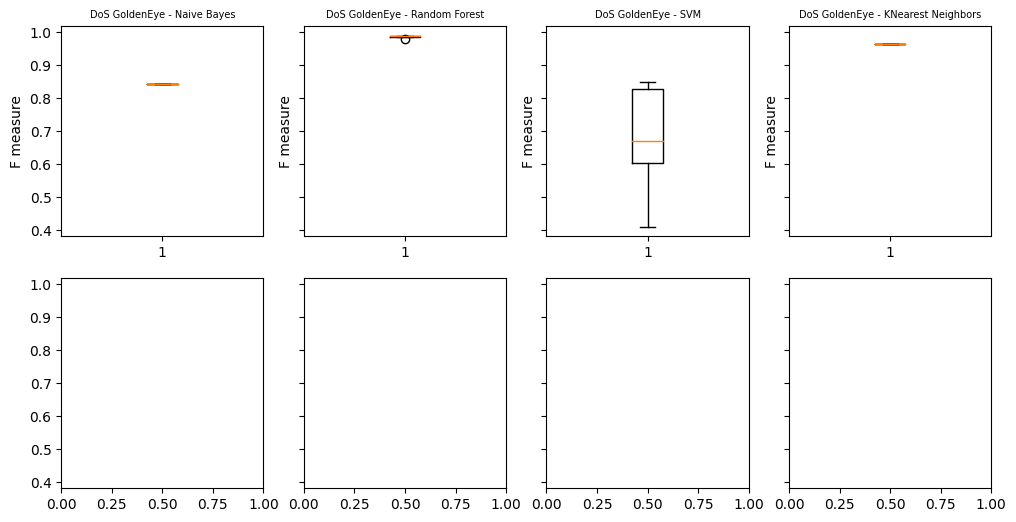


------------------------------------------------------------------------------------------------------


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
DDoS              Naive Bayes        0.6             0.71            0.71            0.6             0.4504         
DDoS              Random Forest      1.0             1.0             1.0             1.0             1.4264         
DDoS              SVM                0.97            0.96            0.98            0.97            66.1652        
DDoS              Nearest Neighbors  1.0             1.0             1.0             1.0             73.3325        


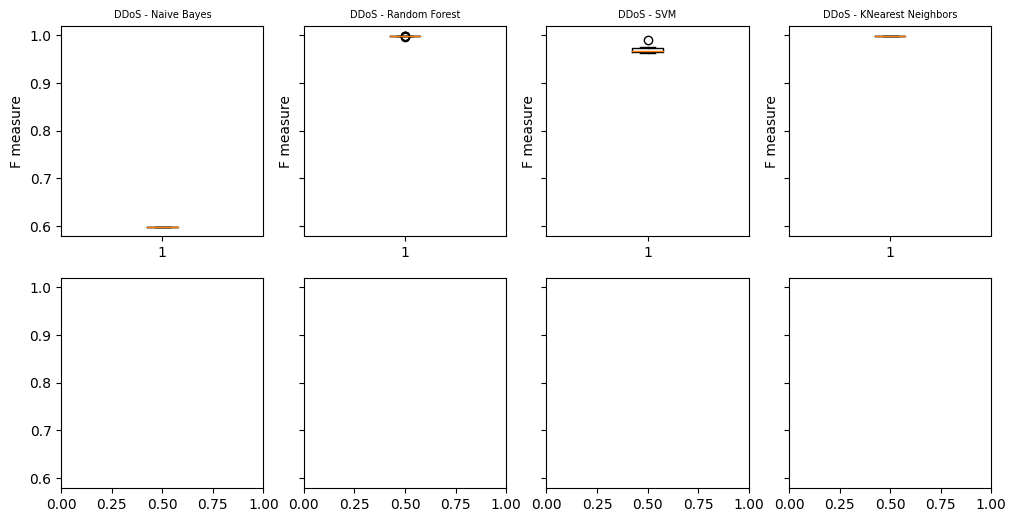


------------------------------------------------------------------------------------------------------


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
PortScan          Naive Bayes        0.38            0.65            0.55            0.35            0.4373         
PortScan          Random Forest      1.0             1.0             1.0             1.0             2.4264         
PortScan          SVM                0.69            0.53            0.59            0.54            107.9547       
PortScan          Nearest Neighbors  1.0             1.0             1.0             1.0             46.7315        


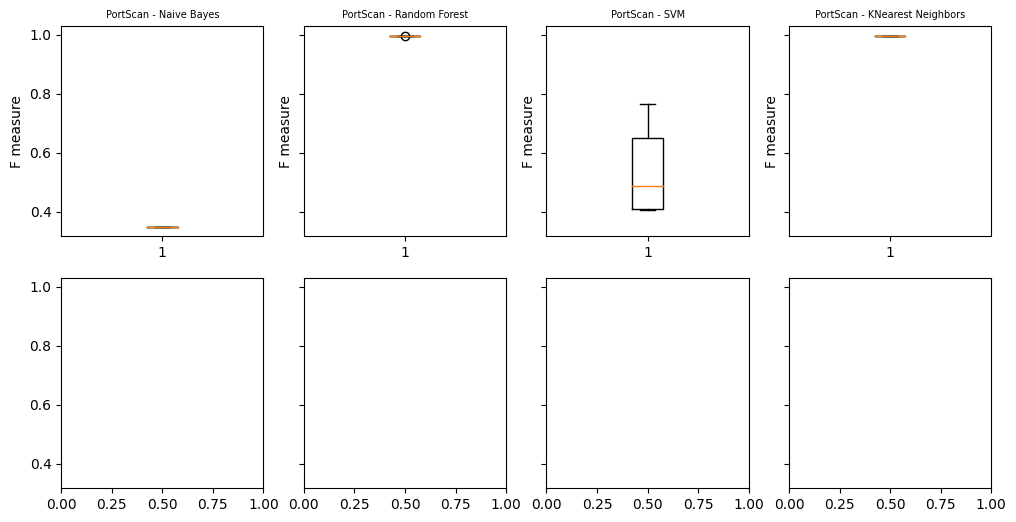


------------------------------------------------------------------------------------------------------


File              ML algorithm       Accuracy        Precision       Recall          F1-score        Time           
DoS Hulk          Naive Bayes        0.33            0.65            0.52            0.27            0.5988         
DoS Hulk          Random Forest      0.95            0.95            0.92            0.94            4.6435         
DoS Hulk          SVM                0.75            0.76            0.72            0.69            163.2931       
DoS Hulk          Nearest Neighbors  0.97            0.96            0.97            0.96            56.3082        


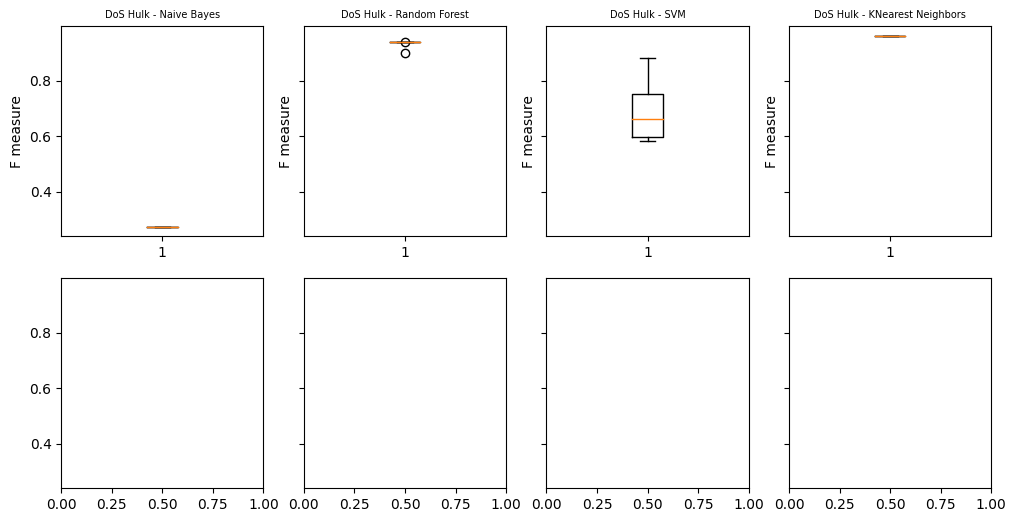


------------------------------------------------------------------------------------------------------


mission accomplished!
Total operation time: =  5412.328319311142 seconds


In [10]:
seconds=time.time()

with open(result_2, "w", newline="",encoding="utf-8") as f:
    wrt = csv.writer(f)
    wrt.writerow(["File","ML algorithm","accuracy","Precision", "Recall" , "F1-score","Time"])

for j in sorted_files: #this loop runs on the list containing the filenames.Operations are repeated for all attack files
    print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("File","ML algorithm","Accuracy","Precision", "Recall" , "F1-score","Time"))# print output header
    a=[]

    feature_list=list(sorted_features[j[0:-4]])
    df=pd.read_csv(path+j,usecols=feature_list)#read an attack file.
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]:
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)
    df["Label"]=attack_or_not


    y = df["Label"] #this section separates the label and the data into two separate pieces, as Label=y Data=X
    del df["Label"]
    feature_list.remove('Label')
    X = df[feature_list]


    for ii in ml_list: #this loop runs on the list containing the machine learning algorithm names. Operations are repeated for all the 7 algorithm
        precision=[]
        recall=[]
        f1=[]
        accuracy=[]
        t_time=[]
        for i in range(repetition): # This loop allows cross-validation and machine learning algorithm to be repeated 10 times
            second=time.time()#time stamp for processing time

            X_train, X_test, y_train, y_test = train_test_split(X, y,#  data (X) and labels (y) are divided into 2 parts to be sent to the machine learning algorithm (80% train,%20 test).
                test_size = second_test_size, random_state = repetition)#  So, in total there are 4 tracks: training data(X_train), training tag (y_train), test data(X_test) and test tag(y_test).


            #machine learning algorithm is applied in this section
            clf = ml_list[ii]#choose algorithm from ml_list dictionary
            clf.fit(X_train, y_train)
            predict=clf.predict(X_test)

            #makes "classification report" and assigns the precision, f-measure, and recall values.s.

            f_1=f1_score(y_test, predict, average='macro')
            pr=precision_score(y_test, predict, average='macro')
            rc=recall_score(y_test, predict, average='macro')

            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time()-second)) )



        print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (j[0:-4],ii,str(round(np.mean(accuracy),2)),str(round(np.mean(precision),2)),
            str(round(np.mean(recall),2)),str(round(np.mean(f1),2)),str(round(np.mean(t_time),4))))#the result of the ten repetitions is printed on the screen.

        with open(result_2, "a", newline="",encoding="utf-8") as f: # all the values found are saved in the opened file.
            wrt = csv.writer(f)
            for i in range(0,len(t_time)):
                wrt.writerow([j[0:-4],ii,accuracy[i],precision[i],recall[i],f1[i],t_time[i]])#file name, algorithm name, precision, recall and f-measure are writed in CSV file
        a.append(f1)


     # In this section, Box graphics are created for the results of machine learning algorithms and saved in the feaure_graph folder.


    ml=["Naive Bayes","Random Forest","SVM","KNearest Neighbors"]
    temp=0
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6), sharey=True)
    for c in range(2):
        for b in range(4):
           if temp < len(a):
            axes[c, b].boxplot(a[temp] )
            axes[c, b].set_title(str(j[0:-4])+" - "+str(ml[temp]),fontsize=7)
            axes[c, b].set_ylabel(("F measure"))
            temp+=1
            if temp==7:
                break
        if temp==7:
            break
    plt.savefig(result_graph_2+j[0:-4]+".pdf",bbox_inches='tight', orientation = 'portrait', format = 'pdf')
    plt.show()
    print("\n------------------------------------------------------------------------------------------------------\n\n")

print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")


### Performance Evaluation of Classification Models on Third Approach (6/4)

In [11]:
seconds=time.time()

with open(result_3, "w", newline="",encoding="utf-8") as f:
    wrt = csv.writer(f)
    wrt.writerow(["File","ML algorithm","accuracy","Precision", "Recall" , "F1-score","Time"])

for j in sorted_files: #this loop runs on the list containing the filenames.Operations are repeated for all attack files
    print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("File","ML algorithm","Accuracy","Precision", "Recall" , "F1-score","Time"))# print output header
    a=[]

    feature_list=list(sorted_features[j[0:-4]])
    df=pd.read_csv(path+j,usecols=feature_list)#read an attack file.
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]:
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)
    df["Label"]=attack_or_not


    y = df["Label"] #this section separates the label and the data into two separate pieces, as Label=y Data=X
    del df["Label"]
    feature_list.remove('Label')
    X = df[feature_list]


    for ii in ml_list: #this loop runs on the list containing the machine learning algorithm names. Operations are repeated for all the 7 algorithm
        precision=[]
        recall=[]
        f1=[]
        accuracy=[]
        t_time=[]
        for i in range(repetition): # This loop allows cross-validation and machine learning algorithm to be repeated 10 times
            second=time.time()#time stamp for processing time

            X_train, X_test, y_train, y_test = train_test_split(X, y,#  data (X) and labels (y) are divided into 2 parts to be sent to the machine learning algorithm (80% train,%20 test).
                test_size = third_test_size, random_state = repetition)#  So, in total there are 4 tracks: training data(X_train), training tag (y_train), test data(X_test) and test tag(y_test).


            #machine learning algorithm is applied in this section
            clf = ml_list[ii]#choose algorithm from ml_list dictionary
            clf.fit(X_train, y_train)
            predict=clf.predict(X_test)

            #makes "classification report" and assigns the precision, f-measure, and recall values.s.

            f_1=f1_score(y_test, predict, average='macro')
            pr=precision_score(y_test, predict, average='macro')
            rc=recall_score(y_test, predict, average='macro')

            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time()-second)) )



        print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (j[0:-4],ii,str(round(np.mean(accuracy),2)),str(round(np.mean(precision),2)),
            str(round(np.mean(recall),2)),str(round(np.mean(f1),2)),str(round(np.mean(t_time),4))))#the result of the ten repetitions is printed on the screen.

        with open(result_3, "a", newline="",encoding="utf-8") as f: # all the values found are saved in the opened file.
            wrt = csv.writer(f)
            for i in range(0,len(t_time)):
                wrt.writerow([j[0:-4],ii,accuracy[i],precision[i],recall[i],f1[i],t_time[i]])#file name, algorithm name, precision, recall and f-measure are writed in CSV file
        a.append(f1)


     # In this section, Box graphics are created for the results of machine learning algorithms and saved in the feaure_graph folder.


    ml=["Naive Bayes","Random Forest","SVM","KNearest Neighbors"]
    temp=0
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6), sharey=True)
    for c in range(2):
        for b in range(4):
           if temp < len(a):
            axes[c, b].boxplot(a[temp] )
            axes[c, b].set_title(str(j[0:-4])+" - "+str(ml[temp]),fontsize=7)
            axes[c, b].set_ylabel(("F measure"))
            temp+=1
            if temp==7:
                break
        if temp==7:
            break
    plt.savefig(result_graph_1+j[0:-4]+".pdf",bbox_inches='tight', orientation = 'portrait', format = 'pdf')
    plt.show()
    print("\n------------------------------------------------------------------------------------------------------\n\n")

print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")


NameError: name 'result_3' is not defined